# RF/DN Multiclass Comparisons on SVHN

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def load_results(prefix):
    """
    Loads results from specified files
    """
    acc_ls = []
    time_ls = []
    for name in names:
        acc_ls.append(load_result(prefix + name + ".txt"))
        time_ls.append(load_result(prefix + name + "_train_time.txt"))
    return acc_ls, time_ls


def produce_mean(ls):
    """
    Produces means from list of 8 results
    """
    ls_space = []
    for i in range(int(len(ls) / 8)):
        l = ls[i * 8 : (i + 1) * 8]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)

In [4]:
def plot_acc(col, accs, pos, samples_space):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 8 : (k + 1) * 8],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 8 : (k + 1) * 8],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 8 : (k + 1) * 8],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 8 : (k + 1) * 8],
            color="#4daf4a",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][5][k * 8 : (k + 1) * 8],
            color="#984ea3",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN32-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
            label="SVM",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN32-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="Resnet18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN32-5L",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )

        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][5]),
            linewidth=5,
            color="#984ea3",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )


def plot_four():
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 11), constrained_layout=True)

    plt.suptitle("Multiclass SVHN Classifications", x=0.53, y=1.03, va="baseline")
    fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
    xtitles = ["3 Classes", "8 Classes"]
    ytitles = ["Accuracy", "Wall Time (s)"]
    ylimits = [[0, 1], [1e-3, 1e3]]
    yticks = [[0, 0.5, 1], [1e-3, 1e0, 1e3]]

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 2 * i + j
            col.set_xscale("log")
            col.set_ylim(ylimits[i])

            samples_space = np.geomspace(10, 10000, num=8, dtype=int)

            # Label x axis and plot figures
            if count < 2:
                col.set_xticks([])
                col.set_title(xtitles[count])
                plot_acc(col, accs, count, samples_space)
            else:
                col.set_xticks([1e1, 1e2, 1e3, 1e4])
                col.set_yscale("log")
                plot_acc(col, accs, count, samples_space)

            # Label y axis
            if count % 2 == 0:
                col.set_yticks(yticks[i])
                col.set_ylabel(ytitles[i])
            else:
                col.set_yticks([])

    fig.align_ylabels(
        ax[
            :,
        ]
    )

    leg = fig.legend(
        bbox_to_anchor=(0.53, -0.2),
        bbox_transform=plt.gcf().transFigure,
        ncol=3,
        loc="lower center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)

## RFs & DNs with Early Stops

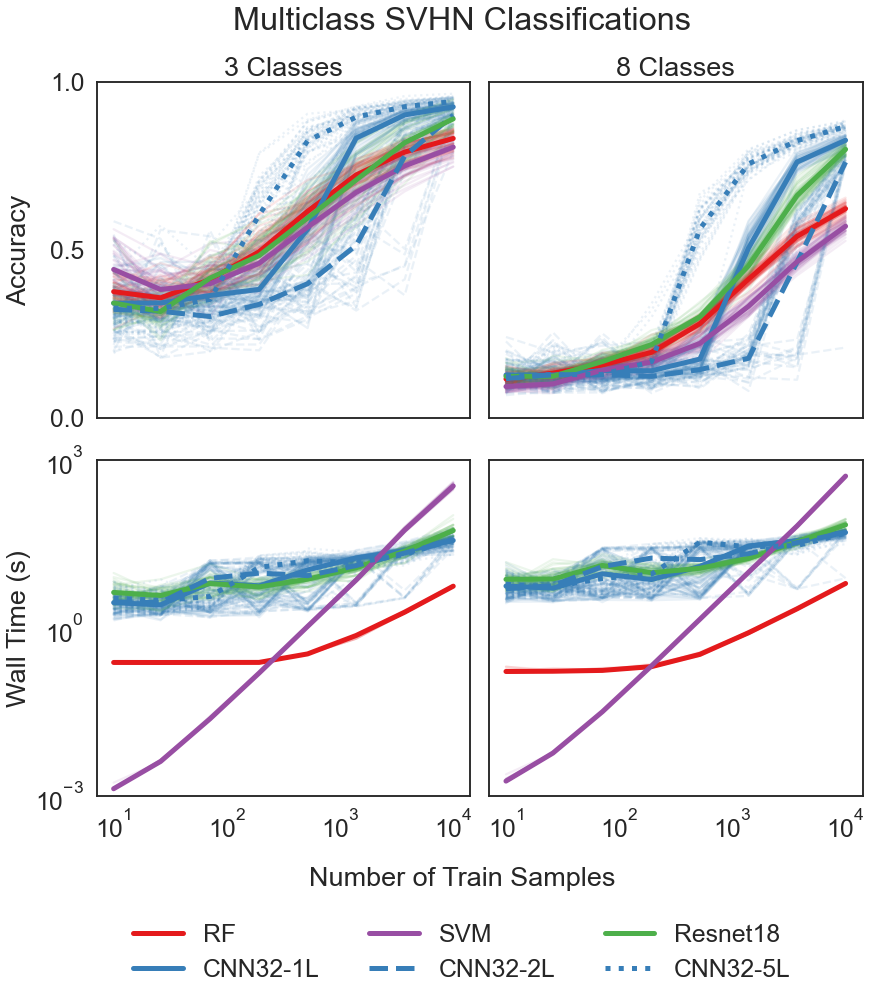

In [5]:
names = ["naive_rf", "cnn32", "cnn32_2l", "cnn32_5l", "resnet18", "svm"]

# Load 3-classes results
acc_3, time_3 = load_results("3_class/svhn_")

# Load 8-classes results
acc_8, time_8 = load_results("8_class/svhn_")

accs = [acc_3, acc_8, time_3, time_8]
plot_four()